# Guía de Laboratorio - CNN y Autoencoder

## Bases para Jupyter Notebook

Las notebook son documentos creados con celdas, en algunas de ellas puedes escribir texto usando __markdown__ y en otras puedes ejecutar código en python.

Puedes ejecutar una celda usando `Shift + Enter` o dando al boton `▶ Run`.

Hay dos tipos de celda:
 - _`Markdown Cell`_: Son las celdas donde puedes escribir texto e incluso adjuntar imágenes, también aceptan LaTeX para la escritura de formulas. 
 
 $$ \begin{bmatrix}
         a_{11} & a_{12} & \cdots & a_{1n}\\
         a_{21} & a_{22} & \cdots & a_{2n}\\
         \vdots & \vdots & \ddots & \vdots\\
         a_{m1} & a_{m2} & \cdots & a_{mn}\\ 
     \end{bmatrix}
     \times
     \begin{bmatrix}
         b_{11} & b_{12} & \cdots & b_{1p}\\
         b_{21} & b_{22} & \cdots & b_{2p}\\
         \vdots & \vdots & \ddots & \vdots\\
         b_{n1} & b_{n2} & \cdots & b_{np}\\
     \end{bmatrix}
      =
     \begin{bmatrix}
         c_{11} & c_{12} & \cdots & c_{1p}\\
         c_{21} & c_{22} & \cdots & c_{2p}\\
         \vdots & \vdots & \ddots & \vdots\\
         c_{m1} & c_{m2} & \cdots & c_{mp}\\
     \end{bmatrix}\\
  c_{ij}= a_{i1} b_{1j} + a_{i2} b_{2j} +\cdots+ a_{in} + b_{nj} = \sum_{k=1}^n a_{ik}b_{kj}  $$
  
      Para ver como hacer esto puedes dar doble click a esta celda para ver su estructura.
      
  - _`Code Cell`_: Son las celdas donde puedes ejecutar codigo en python, el orden de ejecución aparece al lado izquierdo de la celda marcado con <kbd>In [#]</kbd>, en caso de tener algún tipo de salida esta aparecerá debajo de la celda y marcada al lado izquierdo con <kbd>Out [#]</kbd>.

In [64]:
2/3

0.6666666666666666

Hay que tener en cuenta que no es necesario colocar `print()` ya que jupyter notebook ya asume que queremos ver el resultado de operaciones directas o variables

In [65]:
a = 37
a

37

### Modos

En jupyter notebook hay dos modos, `Edit Mode` y `Command Mode`.

- `Edit Mode`: Te permite editar las celdas, para editar una celda puedes dar doble click si es una _markdown cell_ o darle al `Enter`, la celda tendrá un borde verde en este modo.
- `Command Mode`: Te permite editar la estructura general de la notebook.

### Comandos

Comandos importantes a tener en cuenta para un correcto uso de las notebook:

- `Shift + Enter`: Ejecutar las celdas seleccionadas y seleccionar la siguiente.
- `Ctrl + Enter`: Ejecutar las celdas seleccionadas.
- `Shift + Tab`: Ver información de una función.
- `D+D`: En _command mode_, eliminar las celdas seleccionadas.
- `0+0`: Reiniciar el kernel para ejecutar todo de nuevo.
- `A`: En _command mode_, crea una celda arriba de la seleccionada
- `B`: En _command mode_, crea una celda debajo de la seleccionada
- `M`: En _command mode_, convierte la celda seleccionada en una _markdown cell_
- `Y`: En _command mode_, convierte la celda seleccionada en una _code cell_

Para ver más comandos es recomendado ver la sección <kbd>Help > Edit Keyboard Shortcuts</kbd> y agregar uno para el <kbd>Run All Cells Above</kbd>

## Imports Necesarios

Imports necesarios para la guía de laboratorio

In [66]:
import pickle,gzip,math,os,time,shutil,torch,matplotlib as mpl,numpy as np,matplotlib.pyplot as plt
import fastcore.all as fc
import pandas as pd
from collections.abc import Mapping
from pathlib import Path
from operator import attrgetter,itemgetter
from functools import partial
from __future__ import annotations
from itertools import zip_longest

from torch import tensor,nn,optim
from torch.utils.data import DataLoader,default_collate, SequentialSampler, RandomSampler, BatchSampler
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from datasets import load_dataset,load_dataset_builder

from fastprogress import progress_bar,master_bar
from typing import Mapping
from fastcore.test import test_close

In [67]:
import logging
logging.disable(logging.WARNING)

## Bases

### Multiplicación de Matrices

### Tensores

In [145]:
from torch import tensor

En matemáticas los tensores son una generalización de escalares, vectores y matrices, los tensores se pueden clasificar segun su rango, teniendo n-rangos.

Ejemplo de un tensor de rango 0 o simplemente un escalar.

In [146]:
a = tensor(14029309)
a

tensor(14029309)

In [147]:
a = 9902320
tensor = torch.tensor(a)
tensor

tensor(9902320)

Ejemplo de un tensor de rango 1 o vector.

In [148]:
a = [3,2.1,42,13]
tensor = torch.tensor(a)
tensor

tensor([ 3.00,  2.10, 42.00, 13.00])

Ejemplo de un tensor de rango 2 o matriz.

In [149]:
tensor = [[4,3,1], [4,4,1]]
tensor = torch.tensor(tensor)
tensor

tensor([[4, 3, 1],
        [4, 4, 1]])

Podemos crear tensores de diferentes formas y tamaños.

In [150]:
shape = (2,3)
tensor = torch.rand(shape)
tensor

tensor([[0.26, 0.52, 0.40],
        [0.67, 0.93, 0.65]])

Tensor de rango 3

In [151]:
shape = (5,3,4)
tensor = torch.rand(shape)
tensor

tensor([[[0.34, 0.25, 0.06, 0.92],
         [0.41, 0.60, 0.52, 0.18],
         [0.78, 0.78, 0.53, 0.22]],

        [[0.29, 0.51, 0.21, 0.22],
         [0.43, 0.36, 0.62, 0.37],
         [0.43, 0.31, 0.04, 0.94]],

        [[0.60, 0.95, 0.42, 0.37],
         [0.03, 0.31, 0.83, 0.01],
         [0.33, 0.80, 0.79, 0.68]],

        [[0.40, 0.46, 0.41, 0.32],
         [0.71, 0.33, 0.22, 0.61],
         [0.14, 0.39, 0.76, 0.69]],

        [[0.93, 0.16, 0.50, 0.35],
         [0.22, 0.22, 0.63, 0.55],
         [0.24, 0.15, 0.09, 0.99]]])

Tensor de rango 4

In [152]:
shape = (5,3,4,2)
tensor = torch.rand(shape)
tensor

tensor([[[[0.41, 0.38],
          [0.32, 0.25],
          [0.04, 0.21],
          [0.81, 0.61]],

         [[0.32, 0.31],
          [0.82, 0.86],
          [0.98, 0.65],
          [0.74, 0.46]],

         [[0.21, 0.01],
          [0.80, 0.43],
          [0.71, 0.52],
          [0.03, 0.25]]],


        [[[0.64, 0.40],
          [0.02, 0.68],
          [0.52, 0.34],
          [0.70, 0.61]],

         [[0.32, 0.95],
          [0.75, 0.56],
          [0.40, 0.08],
          [0.89, 0.37]],

         [[0.18, 0.82],
          [0.68, 0.62],
          [0.40, 0.34],
          [0.58, 0.89]]],


        [[[0.57, 0.26],
          [1.00, 0.51],
          [0.90, 0.62],
          [0.95, 0.79]],

         [[0.25, 0.85],
          [0.50, 0.10],
          [0.40, 0.05],
          [0.24, 0.15]],

         [[0.84, 0.39],
          [0.41, 0.74],
          [0.70, 0.17],
          [0.68, 0.71]]],


        [[[0.10, 0.93],
          [0.20, 0.30],
          [0.09, 0.96],
          [0.60, 0.92]],

         [[0.5

Suma de tensores con escalares

In [153]:
tensor = torch.rand(2)
tensor, tensor + 1

(tensor([0.44, 0.73]), tensor([1.44, 1.73]))

Multiplicación de tensores por escalar

In [154]:
tensor = torch.ones(3)
tensor, tensor * 2, tensor * 45

(tensor([1., 1., 1.]), tensor([2., 2., 2.]), tensor([45., 45., 45.]))

También podemos hacer multiplicaciones de matrices con tensores

In [162]:
a = torch.rand(2,3)
b = torch.rand(3,2)
a @ b, (a @ b).shape

(tensor([[0.14, 0.53],
         [0.23, 0.31]]),
 torch.Size([2, 2]))

### Optimizer, Data Set y Data Loader

In [69]:
class Optimizer():
    def __init__(self, params, lr=0.5): 
        #Hacemos los params list porque puede ser un generator, que recuerda
        #que es un iterable
        self.params = list(params)
        self.lr = lr

    def step(self):
        with torch.no_grad():
            for p in self.params: p -= p.grad * self.lr

    def zero_grad(self):
        for p in self.params: p.grad.data.zero_()

In [70]:
class Dataset():
    def __init__(self, x, y): self.x,self.y = x,y
    def __len__(self): return len(self.x)
    #El __getitem__ es lo que nos da los valores cuando hacemos por ejemplo 
    #Dataset[n:m]
    def __getitem__(self, i): return self.x[i],self.y[i]

In [71]:
class DataLoaders:
    def __init__(self, *dls): self.train,self.valid = dls[:2]

    @classmethod
    def from_dd(cls, dd, batch_size, as_tuple=True, **kwargs):
        f = collate_dict(dd['train'])
        return cls(*get_dls(*dd.values(), bs=batch_size, collate_fn=f, **kwargs))

Una función `collate` se encarga de convertir un conjunto de datos en otro que nos interesa, en este caso tenemos una función `collate_dict`que se encarga de convertir un diccionario en un DataSet de tuplas de la forma `(x , y)`, con `x` siendo los datos de entrenamiento y `y` las labels

In [72]:
def collate_dict(ds):
    get = itemgetter(*ds.features)
    def _f(b): return get(default_collate(b))
    return _f

Definir la accuracy aquí con Ernesto

In [73]:
def accuracy(out, yb): return (out.argmax(dim=1)==yb).float().mean()

In [74]:
def report(loss, preds, yb): print(f'{loss:.2f}, {accuracy(preds, yb):.2f}')

In [68]:
def inplace(f):
    def _f(b):
        f(b)
        return b
    return _f

## Función de Entrenamiento

Teoría de la fit

In [75]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb,yb in train_dl:
            loss = loss_func(model(xb), yb)
            loss.backward()
            opt.step()
            opt.zero_grad()

        model.eval()
        with torch.no_grad():
            tot_loss,tot_acc,count = 0.,0.,0
            for xb,yb in valid_dl:
                pred = model(xb)
                n = len(xb)
                count += n
                tot_loss += loss_func(pred,yb).item()*n
                tot_acc  += accuracy (pred,yb).item()*n
        print(epoch, tot_loss/count, tot_acc/count)
    return tot_loss/count, tot_acc/count

La función `get_dls` se encarga de crear los Data Loaders de los Data Sets que pasamos.

* `train_ds`: Data set de entrenamiento.
* `valid_ds`: Data set de validación.
* `bs`: _Batch size_.
* `**kwargs`: Otros argumentos nombrados, como <kbd>shuffle = False</kbd>.
* `shuffle = True`: Crea data loaders tomando datos aleatorios del data set, 
* `shuffle = False`: Crea los data loaders en orden

Ejemplo para llamar la función:
```
DataLoaders = get_dls(train_ds, valid_ds, 256, shuffle = False, collate_fn = collate_dict)
```

In [76]:
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, **kwargs))

En esta parte solo definimos unas funciones para envíar los datos al dispositivo

* `mps`: Para dispositivos Apple que usen un chip M1 en adelante.
* `cuda`: Para dispositivos que tengan tarjetas gráficas compatibles de NVIDIA
* `cpu`: En caso de no tener alguno de estos dispositivos lo enviamos a la CPU

In [77]:
def_device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

def to_device(x, device=def_device):
    if isinstance(x, torch.Tensor): return x.to(device)
    if isinstance(x, Mapping): return {k:v.to(device) for k,v in x.items()}
    return type(x)(to_device(o, device) for o in x)

def collate_device(b): return to_device(default_collate(b))

### Funciones de Impresion de Imágenes

Las siguientes 3 celdas solo son funciones para mostrar las imágenes, no es necesario prestarles demasiada atención

In [78]:
@fc.delegates(plt.Axes.imshow)
def show_image(im, ax=None, figsize=None, title=None, noframe=True, **kwargs):
    "Show a PIL or PyTorch image on `ax`."
    if fc.hasattrs(im, ('cpu','permute','detach')):
        im = im.detach().cpu()
        if len(im.shape)==3 and im.shape[0]<5: im=im.permute(1,2,0)
    elif not isinstance(im,np.ndarray): im=np.array(im)
    if im.shape[-1]==1: im=im[...,0]
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    if title is not None: ax.set_title(title)
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    if noframe: ax.axis('off')
    return ax

In [79]:
@fc.delegates(plt.subplots, keep=True)
def subplots(
    nrows:int=1, # Number of rows in returned axes grid
    ncols:int=1, # Number of columns in returned axes grid
    figsize:tuple=None, # Width, height in inches of the returned figure
    imsize:int=3, # Size (in inches) of images that will be displayed in the returned figure
    suptitle:str=None, # Title to be set to returned figure
    **kwargs
): # fig and axs
    "A figure and set of subplots to display images of `imsize` inches"
    if figsize is None: figsize=(ncols*imsize, nrows*imsize)
    fig,ax = plt.subplots(nrows, ncols, figsize=figsize, **kwargs)
    if suptitle is not None: fig.suptitle(suptitle)
    if nrows*ncols==1: ax = np.array([ax])
    return fig,ax

In [80]:
@fc.delegates(subplots)
def get_grid(
    n:int, # Number of axes
    nrows:int=None, # Number of rows, defaulting to `int(math.sqrt(n))`
    ncols:int=None, # Number of columns, defaulting to `ceil(n/rows)`
    title:str=None, # If passed, title set to the figure
    weight:str='bold', # Title font weight
    size:int=14, # Title font size
    **kwargs,
): # fig and axs
    "Return a grid of `n` axes, `rows` by `cols`"
    if nrows: ncols = ncols or int(np.floor(n/nrows))
    elif ncols: nrows = nrows or int(np.ceil(n/ncols))
    else:
        nrows = int(math.sqrt(n))
        ncols = int(np.floor(n/nrows))
    fig,axs = subplots(nrows, ncols, **kwargs)
    for i in range(n, nrows*ncols): axs.flat[i].set_axis_off()
    if title is not None: fig.suptitle(title, weight=weight, size=size)
    return fig,axs

In [81]:
@fc.delegates(subplots)
def show_images(ims:list, # Images to show
                nrows:int|None=None, # Number of rows in grid
                ncols:int|None=None, # Number of columns in grid (auto-calculated if None)
                titles:list|None=None, # Optional list of titles for each image
                **kwargs):
    "Show all images `ims` as subplots with `rows` using `titles`"
    axs = get_grid(len(ims), nrows, ncols, **kwargs)[1].flat
    for im,t,ax in zip_longest(ims, titles or [], axs): show_image(im, ax=ax, title=t)

Configuración adicional para mostrar las imágenes

In [82]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
torch.manual_seed(1)
mpl.rcParams['image.cmap'] = 'gray'
mpl.rcParams['figure.dpi'] = 70

## Presentación de los Datos

Vamos a tomar los datos de **Fashion Mnist**, es un conjunto de datos que consiste en 60.000 ejemplar de entrenamiento y 10.000 ejemplar de validación, cada ejemplar consiste en una imagen de 28x28 pixeles en escala de grises además de una etiqueta correspondiente.

In [83]:
name = "fashion_mnist"
ds_builder = load_dataset_builder(name, trust_remote_code=True)
print(ds_builder.info.description)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of
60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image,
associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in
replacement for the original MNIST dataset for benchmarking machine learning algorithms.
It shares the same image size and structure of training and testing splits.



Con `ds_builder.info.features` podemos ver las caracteríticas de los datos.

In [84]:
ds_builder.info.features

{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

Con `ds_builder.info.splits` podemos ver como están separados los datos.

In [85]:
ds_builder.info.splits

{'train': SplitInfo(name='train', num_bytes=31296607, num_examples=60000, shard_lengths=None, dataset_name='fashion_mnist'),
 'test': SplitInfo(name='test', num_bytes=5233810, num_examples=10000, shard_lengths=None, dataset_name='fashion_mnist')}

In [86]:
x,y = 'image','label'
dsd = load_dataset(name, trust_remote_code=True)

Tengo algo de dudas con el inplace, preguntar a erneston

Esta función simplemente se encarga de transformar los datos en tensores

In [87]:
@inplace
def transformi(b): b[x] = [TF.to_tensor(o) for o in b[x]]

In [88]:
batch_size = 256
transformed_dataset = dsd.with_transform(transformi)

In [89]:
transformed_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [90]:
transformed_dataset['train']

Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})

Aquí podemos ver la primera imagen del Dataset de entrenamiento.

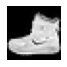

In [95]:
ds = transformed_dataset['train']
img = ds[0]['image']
show_image(img, figsize=(1,1));

In [96]:
collate_function = collate_dict(ds)

Aquí definimos una función para crear los data loaders en nuestro caso

In [97]:
def collate_(b): return to_device(collate_function(b))
def data_loaders(dsd, bs, **kwargs): return {k:DataLoader(v, bs, **kwargs) for k,v in dsd.items()}

In [98]:
dls = data_loaders(transformed_dataset, batch_size, collate_fn = collate_)

In [99]:
dls

{'train': <torch.utils.data.dataloader.DataLoader at 0x14f9c8e8dd0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x14fa206e010>}

- `dt`: Data Loader Training
- `dv`: data Loader Validation

In [100]:
dt = dls['train']
dv = dls['test']

In [102]:
x_batch, y_batch = next(iter(dt))

Aquí podemos ver que el `x_batch` consiste de 256 imágenes de 28x28.

In [103]:
x_batch.shape

torch.Size([256, 1, 28, 28])

Y aquí podemos ver que `y_batch` simplemente tiene las 256 etiquetas

In [104]:
y_batch.shape

torch.Size([256])

In [163]:
y_batch[1]

tensor(0, device='cuda:0')

In [164]:
x_batch

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [165]:
y_batch

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
        9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
        9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 6, 8, 1, 9, 7, 8, 8, 9, 6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6, 4, 1, 8, 7,
        7, 5, 4, 2, 9, 1, 7, 4, 6, 9, 7, 1, 8, 7, 1, 2, 8, 0, 9, 1, 8, 7, 0, 5, 8, 6, 7, 2, 0, 8, 7, 1, 6, 2, 1, 9, 6, 0, 1, 0, 5, 5, 1, 7,
        0, 5, 8, 4, 0, 4, 0, 6, 6, 4, 0, 0, 4, 7, 3, 0, 5, 8, 4, 1, 1, 2, 9, 2, 8, 5, 0, 6, 3, 4, 6, 0, 9, 1, 7, 3, 8, 5, 8, 3, 8, 5, 2, 0,
        8, 7, 0, 3, 5, 0, 6, 5, 2, 7, 5, 2, 6, 8, 2, 6, 8, 0, 4, 4, 4, 4, 4, 1, 5, 6, 5, 3, 3, 7, 3, 3, 6, 2, 8, 4], device='cuda:0')

In [166]:
labels = ds.features[y].names

In [167]:
labels

['T - shirt / top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [168]:
label_getter = itemgetter(*y_batch[:16])
titles = label_getter(labels)

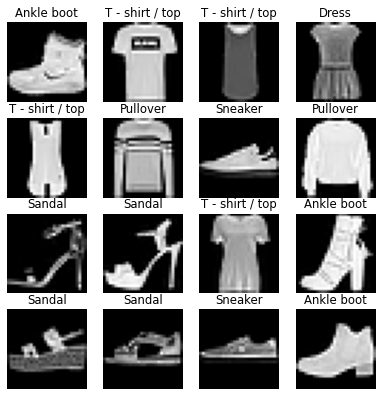

In [169]:
show_images(x_batch[:16], imsize=1.7, titles=titles)

## Convolutional Neural Network

In [19]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
#El mdkir crea un directorio,] exist_ok=True es para que no de error cuando vea que el directorio ya existe previamente
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [20]:
from urllib.request import urlopen
from shutil import copyfileobj

with urlopen(MNIST_URL) as in_stream, open(path_gz, 'wb') as out_file:
    copyfileobj(in_stream, out_file)
#destructuring
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
x_train, y_train, x_valid, y_valid = map(tensor, [x_train, y_train, x_valid, y_valid])

## Teoría Aquí

### Understanding the Convolution Equations

Vamos a tomar una imagen de nuestro training data y una imagen de nuestro validation data

In [21]:
x_imgs = x_train.view(-1,28,28)
xv_imgs = x_valid.view(-1,28,28)

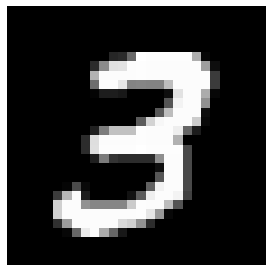

In [22]:
im3 = x_imgs[7]
show_image(im3);

In [23]:
top_edge = tensor([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]]).float()

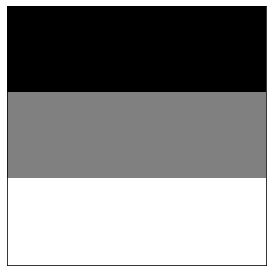

In [24]:
show_image(top_edge, noframe=False);

The filter will take any window of size 3×3 in our images, and if we name the pixel values like this:

$$\begin{matrix} a1 & a2 & a3 \\ a4 & a5 & a6 \\ a7 & a8 & a9 \end{matrix}$$

it will return $-a1-a2-a3+a7+a8+a9$.

Aquí estamos viendo la imagen que sacamos de nuestros datos y en especifico estamos mirando las `primeras 13 filas` y las `primeras 23 columnas`

In [25]:
df = pd.DataFrame(im3[:13,:23])
df.style.format(precision=2).set_properties(**{'font-size':'7pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.17,0.41,1.00,0.99,0.99,0.99,0.99,0.99,0.68,0.02,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.54,0.88,0.88,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.98,0.62,0.05
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.98,0.98,0.98,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.23
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.98,0.98,0.90,0.52,0.52,0.52,0.52,0.74,0.98,0.98,0.98,0.98,0.23
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.11,0.11,0.09,0.00,0.00,0.00,0.00,0.05,0.88,0.98,0.98,0.67,0.03


Ahora vamos a aplicar el kernel `top_edge` a una posición que va desde 3 a 6 (sin incluir el 6) y las columnas desde 14 a 17 (sin incluir el 17)

In [177]:
(im3[3:6,14:17] * top_edge).sum()

tensor(2.97)

In [178]:
(im3[7:10,14:17] * top_edge).sum()

tensor(-2.96)

Como se puede ver con el nombre del kernel `top_edge` está haciendo una multiplicación que se encagaría de "detectar" los lados superiores, da positivo si es un top edge y negativo si es un bottom edge

Ahora vamos a definir una función que haga esa multiplicación del kernel por nosotros

In [179]:
def apply_kernel(row, col, kernel): return (im3[row-1:row+2,col-1:col+2] * kernel).sum()

Y le pasamos el centro donde queremos aplicar el kernel, por ejemplo para aplica el que tenemos arriba (im3[3:6, 14:17]) le pasamos el centro (4,16)

In [180]:
apply_kernel(4,15,top_edge)

tensor(2.97)

Aquí estamos haciendo una list comprehension inside a list comprehension que nos devuelve las tuplas


In [181]:
[[(i,j) for j in range(5)] for i in range(5)]

[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],
 [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)],
 [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)],
 [(3, 0), (3, 1), (3, 2), (3, 3), (3, 4)],
 [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]]

y aquí podemos aplicarlo con nuestro kernel

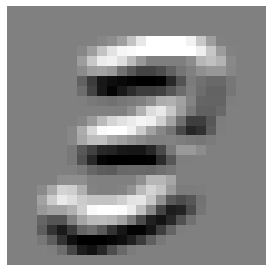

In [182]:
rng = range(1,27)
top_edge3 = tensor([[apply_kernel(i,j,top_edge) for j in rng] for i in rng])
show_image(top_edge3);

Y lo que estamos haciendo aquí es resaltar las top edges y __esto es una convolutión__

Ahora podemos hacer lo mismo con los bordes izquierdos

In [183]:
left_edge = tensor([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]]).float()

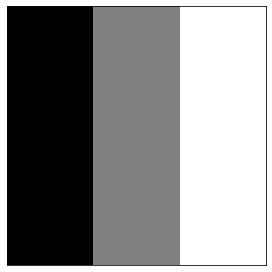

In [184]:
show_image(left_edge, noframe=False);

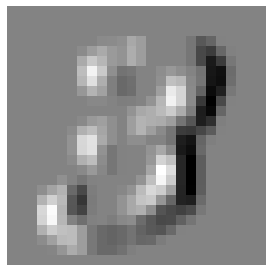

In [185]:
left_edge3 = tensor([[apply_kernel(i,j,left_edge) for j in rng] for i in rng])
show_image(left_edge3);

Esto es basicamente lo que está pasando con todas estas convolutions

### Convolutions in PyTorch

In [186]:
import torch.nn.functional as F
import torch

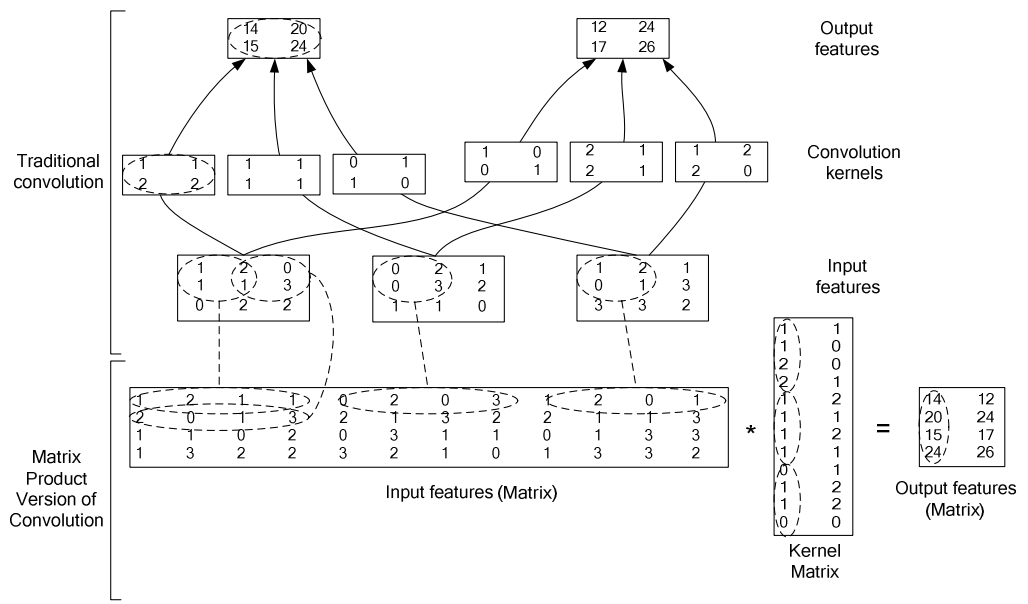

Here's a sample [numpy implementation](https://github.com/3outeille/CNNumpy/blob/5394f13e7ed67a808a3e39fd381f168825d65ff5/src/fast/utils.py#L360).

Aquí lo que vamos a hacer es convertir todo el proceso de la convolution en una multiplicación de matrices

In [187]:
im3.shape 

torch.Size([28, 28])

Aquí le agregamos dimensiones a la imagen porque es algo que espera PyTorch para poder usar el unfold

In [188]:
inp = im3[None,None,:,:].float()
inp.shape

torch.Size([1, 1, 28, 28])

In [189]:
inp_unf = F.unfold(inp, (3,3))[0]
inp_unf.shape

torch.Size([9, 676])

Aquí estamos convirtiendo nuestro kernel en un vector
- `view` cambia la forma de un tensor, y con el -1 lo que estamos diciendo es que tire todo a esa dimensión

In [190]:
w = left_edge.view(-1)
w.shape

torch.Size([9])

Y aquí hacemos la multiplicación de matrices para que nos de el mismo resultado

In [191]:
out_unf = w@inp_unf
out_unf.shape

torch.Size([676])

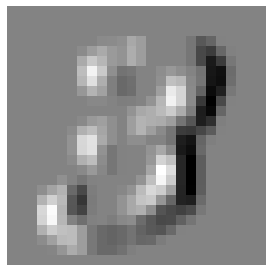

In [192]:
out = out_unf.view(26,26)
show_image(out);

In [193]:
%timeit -n 1 tensor([[apply_kernel(i,j,left_edge) for j in rng] for i in rng]);

19.3 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [194]:
%timeit -n 100 (w@F.unfold(inp, (3,3))[0]).view(26,26);

116 µs ± 35.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Y como se puede ver en los resultados de tiempo este proceso es mucho más rapido que nuestra implementación from scratch

Pytorch ya tiene su implementación de las convolutions usando `F.conv2d`

In [195]:
%timeit -n 100 F.conv2d(inp, left_edge[None,None])

56.5 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [196]:
diag1_edge = tensor([[ 0,-1, 1],
                     [-1, 1, 0],
                     [ 1, 0, 0]]).float()

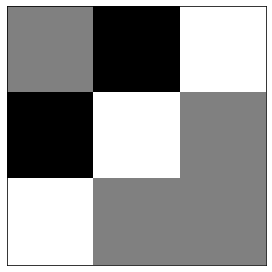

In [197]:
show_image(diag1_edge, noframe=False);

In [198]:
diag2_edge = tensor([[ 1,-1, 0],
                     [ 0, 1,-1],
                     [ 0, 0, 1]]).float()

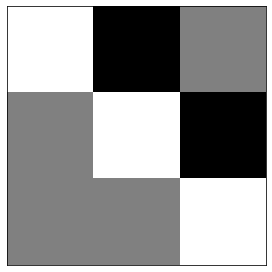

In [199]:
show_image(diag2_edge, noframe=False);

In [200]:
xb = x_imgs[:16][:,None]
xb.shape

torch.Size([16, 1, 28, 28])

In [201]:
edge_kernels = torch.stack([left_edge, top_edge, diag1_edge, diag2_edge])[:,None]
edge_kernels.shape

torch.Size([4, 1, 3, 3])

In [202]:
batch_features = F.conv2d(xb, edge_kernels)
batch_features.shape

torch.Size([16, 4, 26, 26])

The output shape shows we gave 64 images in the mini-batch, 4 kernels, and 26×26 edge maps (we started with 28×28 images, but lost one pixel from each side as discussed earlier). We can see we get the same results as when we did this manually:

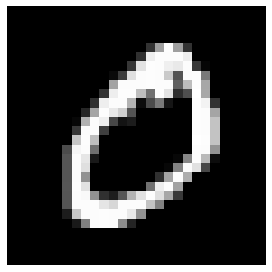

In [203]:
img0 = xb[1,0]
show_image(img0);

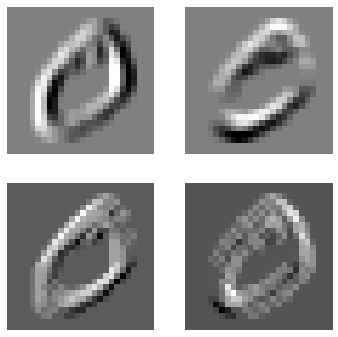

In [204]:
show_images([batch_features[1,i] for i in range(4)])

### Strides and Padding

No hay necesidad de mover la matriz de a uno, se puede hacer de diferentes numeros y eso es llamado the _stride_

## Creating the CNN

In [205]:
n,m = x_train.shape
c = y_train.max()+1
nh = 50

In [206]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [207]:
broken_cnn = nn.Sequential(
    nn.Conv2d(1,30, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(30,10, kernel_size=3, padding=1)
)

In [208]:
broken_cnn(xb).shape

torch.Size([16, 10, 28, 28])

Así es como definiamos antes nuestro modelos, pero con una CNN no es tan simple, para hacer nuestra vida más simple vamos a hacer la siguiente función y con la etiqueta de _`#|export`_ para nuestra librería de miniai

- `ni`: number of inputs
- `nf`: Number of filters, es una manera de decir la cantidad de channels que tendrá nuestra conv net, es como decir el number of outputs
- `ks`: kernel size
- `stride`: Lo que vimos arriba
- `act`: Activation, esto decide si luego de nuestra conv net se va a activar un ReLU

In [209]:
def conv(ni, nf, ks=3, stride=2, act=True):
    res = nn.Conv2d(ni, nf, stride=stride, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

## Entrenando la CNN

In [210]:
learning_rate = 0.4

In [211]:
cnn = nn.Sequential(
    conv(1 ,4),            #14x14
    conv(4 ,8),            #7x7
    conv(8 ,16),           #4x4
    conv(16,16),           #2x2
    conv(16,10, act=False),
    nn.Flatten()).to(def_device)

In [212]:
opt = optim.SGD(cnn.parameters(), lr=learning_rate)
loss,acc = fit(5, cnn, F.cross_entropy, opt, dt, dv)

0 0.7604680015563965 0.704
1 0.5455606720924377 0.8041
2 0.4685450321674347 0.8297
3 0.4387235179901123 0.8399
4 0.42149679222106934 0.8451


In [213]:
dsd['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
 'label': 9}

## Autoencoder

Aqui vamos a crear una `deconvolutional function`, que hará lo contrario de la convolution que definimos antes

In [214]:
def deconv(ni, nf, ks=3, act=True):
    layers = [nn.UpsamplingNearest2d(scale_factor=2),
              nn.Conv2d(ni, nf, stride=1, kernel_size=ks, padding=ks//2)]
    if act: layers.append(nn.ReLU())
    return nn.Sequential(*layers)

Aquí definimos dos funciones para el `fit` que teníamos antes 

In [215]:
def eval(model, loss_func, valid_dl, epoch=0):
    model.eval()
    with torch.no_grad():
        tot_loss,count = 0.,0
        for xb,_ in valid_dl:
            pred = model(xb)
            n = len(xb)
            count += n
            tot_loss += loss_func(pred,xb).item()*n
    print(epoch, f'{tot_loss/count:.3f}')

La diferencia es que ahora en la parte de `Loss` no se está calculando un loss con respecto a un validation set, sino que se está comparando consigo mismo, porque necesitamos entrenarlo para que recree lo que le entro, así funciona un autoencoder

In [216]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb,_ in train_dl:
            loss = loss_func(model(xb), xb)
            loss.backward()
            opt.step()
            opt.zero_grad()
        eval(model, loss_func, valid_dl, epoch)

Y Aquí definimos nuestro Autoencoder

`nn.Sigmoid` hace que todos los valores estén dentro de 0 y 1

In [217]:
autoencoder = nn.Sequential(   #28x28
    nn.ZeroPad2d(2),  #32x32
    conv(1,2),        #16x16
    conv(2,4),        #8x8
#     conv(4,8),        #4x4
#     deconv(8,4),      #8x8
    deconv(4,2),      #16x16
    deconv(2,1, act=False), #32x32
    nn.ZeroPad2d(-2), #28x28
    nn.Sigmoid()
).to(def_device)

In [218]:
eval(autoencoder, F.mse_loss, dv)

0 0.179


In [219]:
opt = optim.AdamW(autoencoder.parameters(), lr=0.01)
fit(5, autoencoder, F.mse_loss, opt, dt, dv)

0 0.015
1 0.013
2 0.013
3 0.012
4 0.012


In [220]:
opt = optim.SGD(autoencoder.parameters(), lr=0.1)
fit(5, autoencoder, F.mse_loss, opt, dt, dv)

0 0.012
1 0.012
2 0.012
3 0.012
4 0.012


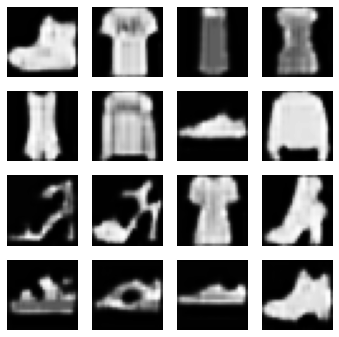

In [221]:
p = autoencoder(x_batch)
show_images(p[:16].data.cpu(), imsize=1.5)

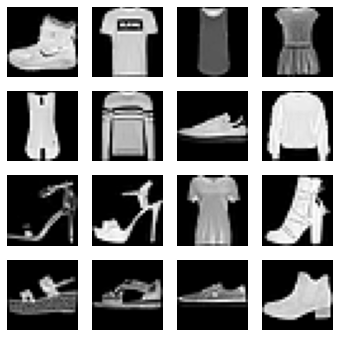

In [222]:
show_images(x_batch[:16].data.cpu(), imsize=1.5)